# Project: Predicting obesity 
This project aims to develope a machine learning model to classify participants based on health and lifestyle survey data, optimizing to ensure higher-risk cases are correctly priorirized.

## Problem Statement
The goal of this project is to determine a predictive model that accuractly classifies individuals into different obesity levels. Given the ordinal nature of obesity classification, it is important to not only assign the correct class, but also ensure that higher-risk cases are ranked above lower-risk cases.To accomplish this, the model is optimized using the One-vs-One ROC-AUC metric, which evaluates how well the model distinguishes between each pair of obesity levels. This ensures that the model effectively distinguishes between obesity categories and minimizes ranking errors, in turn prioritizing individuals based on obesity risk.

## Objective
- Develop a machine learning model to classify participants into different obesity levels.
- Analyze dataset feature to determine features with the highest impact to predictions.
- Compare different classification models and tune hyperparameters to improve generalizations.
- Optimize for One-vs-One ROC-AUC to prioritize individuals with higher obesity risk.
- Evaluate the model using multiple metrics (Accuracy, F1-score, ROC-AUC)

## Dataset feature Description
Gender – Male or Female.  
Age – The person’s age in years.  
Height – Height in meters.  
Weight – Weight in kilograms.  
family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).  
FAVC – If the person frequently consumes high-calorie foods (yes/no).  
FCVC – Frequency of vegetable consumption (scale from 1 to 3).  
NCP – Number of main meals per day.  
CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).  
SMOKE – Whether the person smokes (yes/no).  
CH2O – Daily water intake (scale from 1 to 3).  
SCC – If the person monitors their calorie intake (yes/no).  
FAF – Physical activity frequency (scale from 0 to 3).  
TUE – Time spent using technology (scale from 0 to 3).  
CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).  
MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).  
NObeyesdad – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).  

# Import libraries and load the data

In [129]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from src.utils import get_outliers, standardize

%matplotlib inline

These are most of the import we will need for this project.

In [130]:
df = pd.read_csv("./data/ObesityDataSet_raw_and_data_sinthetic.csv")

df.shape

(2111, 17)

The dataset is imported and it has 17 columns and just over 2k rows.

# Explore the data

In [131]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [132]:
print("Missing data:", df.isna().sum().sum())

df.info()

Missing data: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF               

There is no missing data.  

This shows that the dataset has almost an even amount of numerical and categorical features.

In [133]:
df.select_dtypes('number').describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Many of the numerical features have similar ranges, some outliers exist so standardization may be required.

In [134]:
str_feature_columns = df.select_dtypes("object").columns

for col in str_feature_columns:
    print(col, "has", df[col].unique().size, "unique values.")

Gender has 2 unique values.
family_history_with_overweight has 2 unique values.
FAVC has 2 unique values.
CAEC has 4 unique values.
SMOKE has 2 unique values.
SCC has 2 unique values.
CALC has 4 unique values.
MTRANS has 5 unique values.
NObeyesdad has 7 unique values.


Some categorical features only have 2 categories, therefore these can be turned into boolean features where true/false indicate each of the existing categories.

The other categorical features with more than 2 categories, will need more advanced encoding methods. These features will need to be analyzed to determine the appropriate encoding method.

# Feature Visualization

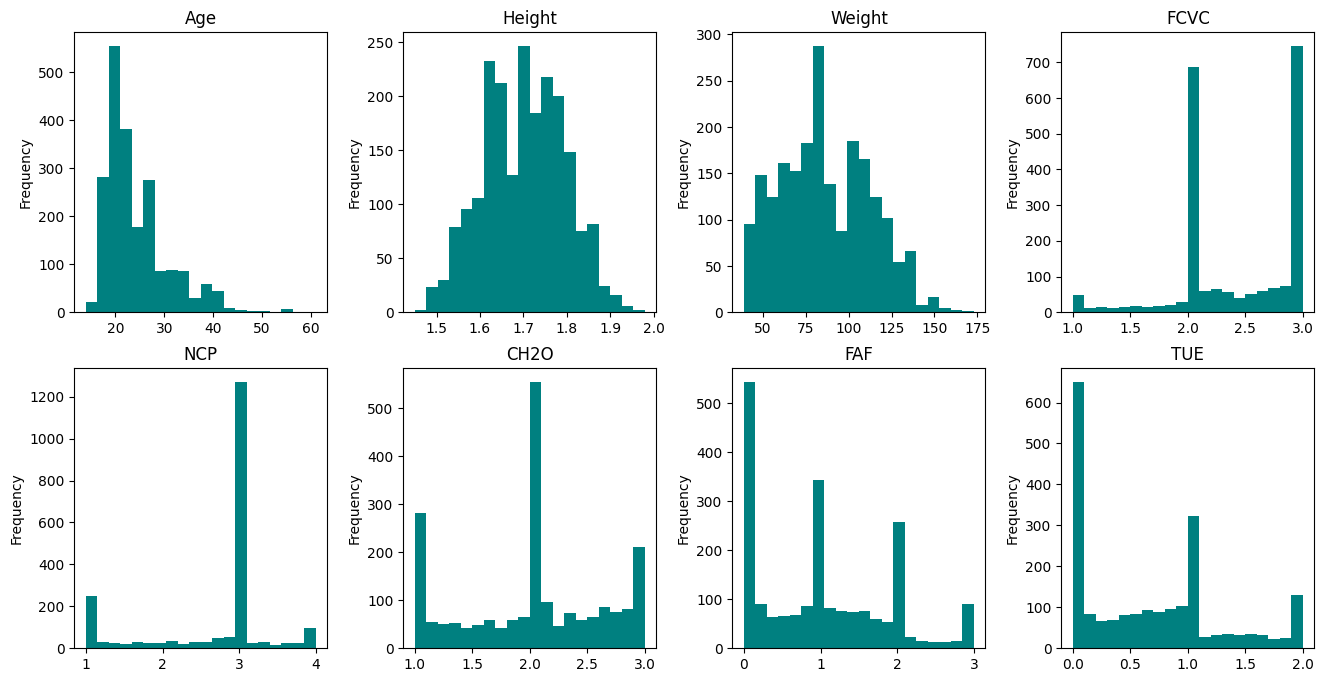

In [135]:
numerical_features = df.select_dtypes("number").columns

bins = [20, 20, 20, 20, 20, 20, 20, 20]

rows = 2
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(16, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)
for i, col in enumerate(numerical_features):
    df[col].plot.hist(ax=axs[i//cols, i%cols], bins=bins[i], color="teal")
    axs[i//cols, i%cols].title.set_text(col)
    
plt.show()

The distribution of the physiological features (Age, Height, and Weight) resemble a Gaussian curve. Additionally, Age appears to be skewed to the right. 

The other numerical features have multimodal distributions, with peaks around the integer values of the range. This may produce false positives when detecting outliers.

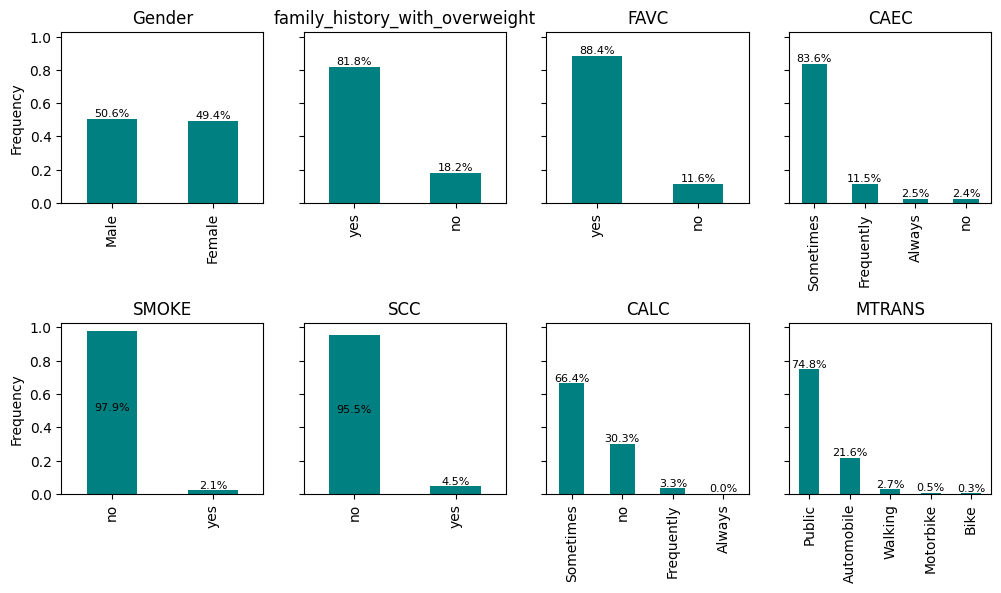

In [136]:
category_features = df.drop("NObeyesdad", axis=1).select_dtypes("object").columns

df_display = df.copy()
df_display.loc[df_display["MTRANS"] == "Public_Transportation", "MTRANS"] = "Public"

rows = 2
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 6), sharey=True)
plt.subplots_adjust(wspace=0.2, hspace=0.7)
for i, col in enumerate(category_features):
    ax = axs[i//cols, i%cols]
    df_display[col].value_counts(normalize=True).plot.bar(ax=ax, color="teal")
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Frequency")
    
    for bar in ax.patches:
        height = bar.get_height() / 2 if bar.get_height() > 0.90 else bar.get_height()
        
        ax.text(bar.get_x() + bar.get_width() / 2, height, 
                f"{bar.get_height()*100:.1f}%", ha="center", va="bottom", 
                fontsize=8, color="black")
    

plt.show() 

The gender feature is well distributed among both genders.  

The other categorical features are heavely skewed to one option over all others.

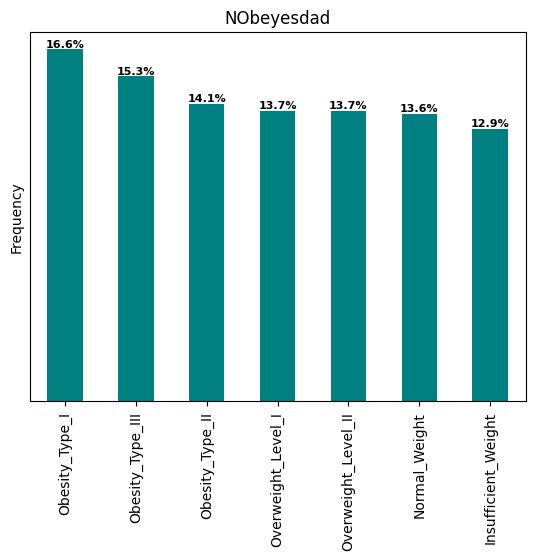

In [137]:
df["NObeyesdad"].value_counts(normalize=True).plot.bar(color="teal")
plt.title("NObeyesdad")
plt.xlabel("")
plt.ylabel("Frequency")


plt.yticks([])


for bar in plt.gca().patches:
    height = bar.get_height() / 2 if bar.get_height() > 0.90 else bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{bar.get_height()*100:.1f}%", ha="center", va="bottom", fontsize=8, color="black", weight="bold")

plt.show()

The target column has a pretty balanced distribution all 7 categories, with all values all between 12% and 17%.

All categories in the targe column have a frequency of 12%-17%. Well balanced classes helps create models that predict all classes well.

# Feature Enginering

In [138]:
# Turned string values to boolean in Gender: "Male" -> True, "Female" -> False
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

# Turned string values to boolean in family_history_with_overweight: "yes" -> True, "no" -> False
df["family_history_with_overweight"] = (df["family_history_with_overweight"] == "yes").astype("bool")
df.rename(columns={"family_history_with_overweight": "overweight_family_history"}, inplace=True)

# Turned string values to boolean in FAVC: "yes" -> True, "no" -> False
df["FAVC"] = (df["FAVC"] == "yes").astype("bool")

# Ordinal encoding CAEC: "no" -> 0, "Sometimes" -> 1, "Frequently" -> 2, "Always" -> 3
df["CAEC"] = df["CAEC"].astype(pd.CategoricalDtype(categories=["no", "Sometimes", "Frequently", "Always"], ordered=True))

# Turned string values to boolean in SMOKE: "yes" -> True, "no" -> False
df["SMOKE"] = (df["SMOKE"] == "yes").astype("bool")

# Turned string values to boolean in SCC: "yes" -> True, "no" -> False
df["SCC"] = (df["SCC"] == "yes").astype("bool")

# Ordinal encoding CALC: "no" -> 0, "Sometimes" -> 1, "Frequently" -> 2, "Always" -> 3
df["CALC"] = df["CALC"].astype(pd.CategoricalDtype(categories=["no", "Sometimes", "Frequently", "Always"], ordered=True))

# one
df = pd.get_dummies(df, columns=["MTRANS"], drop_first=True)
# Dropped category is "Automobile"

#Ordinal encoding NObeyesdad: "Insufficient_Weight" -> 0, "Normal_Weight" -> 1, 
# "Overweight_Level_I" -> 2, "Overweight_Level_II" -> 3, "Obesity_Type_I" -> 4, 
# "Obesity_Type_II" -> 5, "Obesity_Type_III" -> 6
df["NObeyesdad"] = df["NObeyesdad"].astype(pd.CategoricalDtype(categories=["Insufficient_Weight", "Normal_Weight", 
                                                                           "Overweight_Level_I", "Overweight_Level_II", 
                                                                           "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], ordered=True))

df.head()
# df["CAEC"].value_counts()

,Age,Height,Weight,overweight_family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,Gender_Male,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.0,True,False,2.0,3.0,Sometimes,False,2.0,False,0.0,1.0,no,Normal_Weight,False,False,False,True,False
1,21,1.52,56.0,True,False,3.0,3.0,Sometimes,True,3.0,True,3.0,0.0,Sometimes,Normal_Weight,False,False,False,True,False
2,23,1.80,77.0,True,False,2.0,3.0,Sometimes,False,2.0,False,2.0,1.0,Frequently,Normal_Weight,True,False,False,True,False
3,27,1.80,87.0,False,False,3.0,3.0,Sometimes,False,2.0,False,2.0,0.0,Frequently,Overweight_Level_I,True,False,False,False,True
4,22,1.78,89.8,False,False,2.0,1.0,Sometimes,False,2.0,False,0.0,0.0,Sometimes,Overweight_Level_II,True,False,False,True,False


This encodes all the categorical features and the target variable. The method for encoding depends of the cardinality of the feature and if the categories are ordinal.

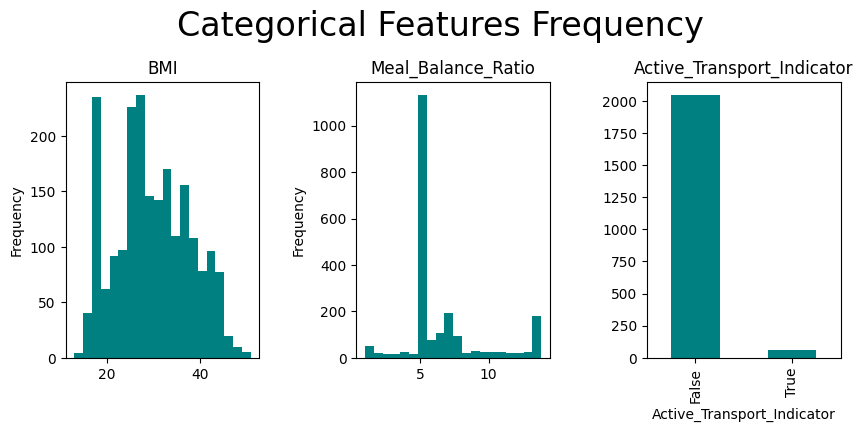

In [139]:
# BMI is a index used to healthy weight based on height
# NOTE: may remove later due to target leakage, the target (NObeyesdad) is based on BMI
df["bmi"] = df["Weight"] / (df["Height"]**2)


# Higher ratio -> More planned meals and less snacking
# Values were standardized before dividing to avoid disconnectivity of the denominator being an interger
# Ration is Shifted to start from 1, to improve interpretability
df["Meal_Balance_Ratio"] = standardize(df["NCP"]) / standardize(df["CAEC"].cat.codes + 1)
df["Meal_Balance_Ratio"] = df["Meal_Balance_Ratio"] - df["Meal_Balance_Ratio"].min() + 1

# True if the person uses an active mode of transport
df["Active_Transport_Indicator"] = (df["MTRANS_Bike"] == True) | (df["MTRANS_Walking"] == True)

cols = 3
fig, axs = plt.subplots(1, cols, figsize=(10, 4))
fig.suptitle('Categorical Features Frequency', fontsize=24)
fig.subplots_adjust(top=0.8, wspace=0.5)

df["bmi"].plot.hist(bins=20, color="teal", ax=axs[0])
axs[0].title.set_text("BMI")

df["Meal_Balance_Ratio"].plot.hist(bins=20, color="teal", ax=axs[1])
axs[1].title.set_text("Meal_Balance_Ratio")

df["Active_Transport_Indicator"].value_counts().plot.bar(color="teal", ax=axs[2])
axs[2].title.set_text("Active_Transport_Indicator")

plt.show()

3 new derived features are created from the the existing features. These derived features are likely to help the model the complex relationships between the features and target variables.

These derived features will show complex relationships between the features to help predict the target variable.

# Outlier Detection

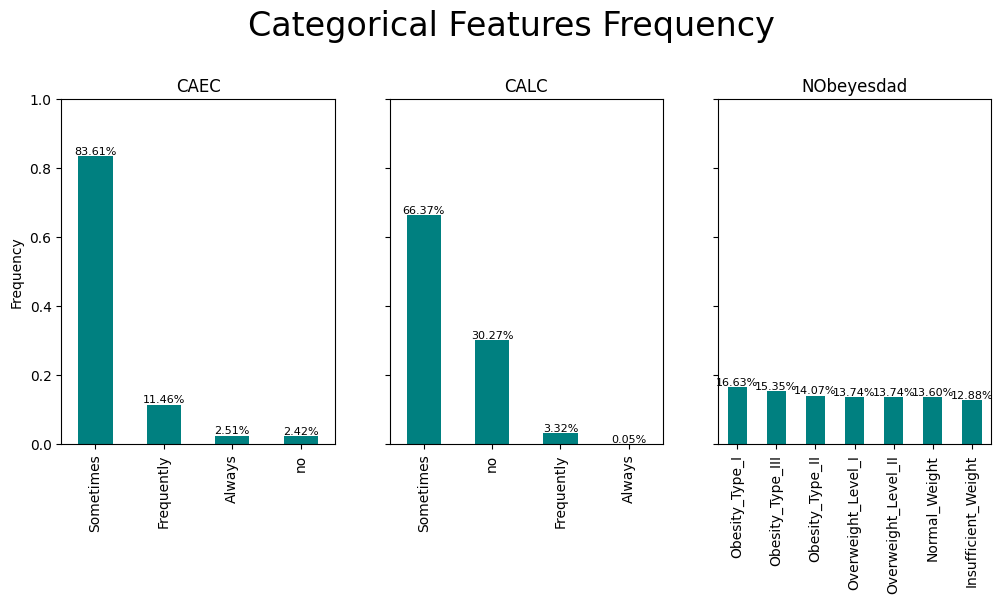

In [140]:
categorical_features = df.select_dtypes("category").columns


cols = 3
fig, axs = plt.subplots(1, cols, figsize=(12, 5), sharey=True)
fig.suptitle('Categorical Features Frequency', fontsize=24)
fig.subplots_adjust(top=0.8)

for i, col in enumerate(categorical_features):
    ax = axs[i]
    
    freq = df[col].value_counts(normalize=True)
    freq.plot.bar(ax=ax, color="teal")
    
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Frequency")
    ax.set_ylim(0, 1)
    
    for bar in ax.patches:
        height = bar.get_height() / (2 if bar.get_height() > 0.90 else 1)
        
        ax.text(bar.get_x() + bar.get_width() / 2, height, 
                f"{bar.get_height()*100:.2f}%", ha="center", va="bottom", 
                fontsize=8, color="black")
    
    
plt.show()

The "Always" option appears only 0.05% in CALC. This is extremely rare, so it will be useful to merge it with "Frequently"

In [141]:
df.loc[df["CALC"] == "Always", "CALC"] = "Frequently"
df["CALC"] = df["CALC"].cat.remove_categories(["Always"])

df["CALC"].value_counts()

CALC
Sometimes     1401
no             639
Frequently      71
Name: count, dtype: int64

CALC no longer has a "Always" value and the category has also been removed.

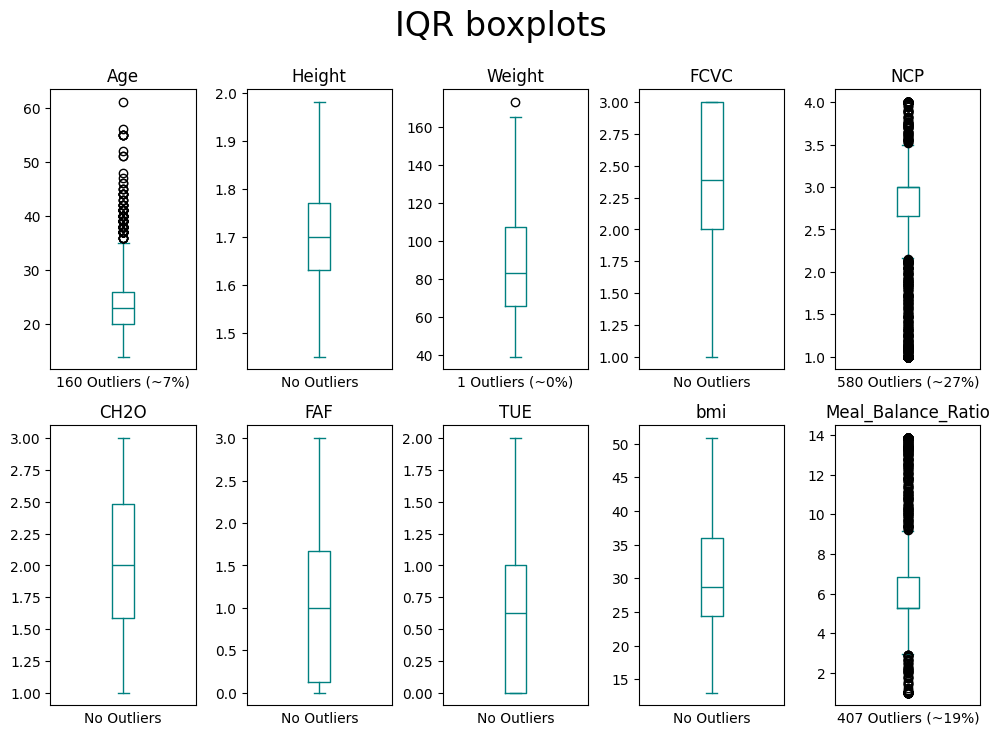

In [142]:

numerical_features = df.select_dtypes("number").columns

rows = 2
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
fig.suptitle('IQR boxplots', fontsize=24)

plt.subplots_adjust(wspace=0.35, hspace=0.2)
for i, col in enumerate(numerical_features):
    outlier_count = get_outliers(df[col], "iqr").size
    
    ax = axs[i//cols, i%cols]
    df[col].plot.box(ax=ax, color="teal")
    ax.title.set_text(col)
    ax.set_xticks([])
    ax.set_xlabel(f"{outlier_count} Outliers (~{outlier_count*100//len(df)}%)" if outlier_count != 0 else "No Outliers")
plt.show()

These boxplots show Age, Weight, NCP, and Meal_Balance_Ratio have outliers.  

Keeping in mind the distrubution of values of these features Age and Weight have roughly a normal distribution. I want to look at the Z-scores for Age and Weight, before making the decision of removal/replacement.  

Looking more into NCP it looks like it has a multimodal distribution with >50% of the values at NCP = 3. With this in mind, I will need to access these outliers further to determine if they are realistic and meaningful or errors/anomalies. ;

Meal_Balance_Ratio has 22 outliers from values of 3-4. There values seem normal for now, I will want to see the Z-values for it then decide.

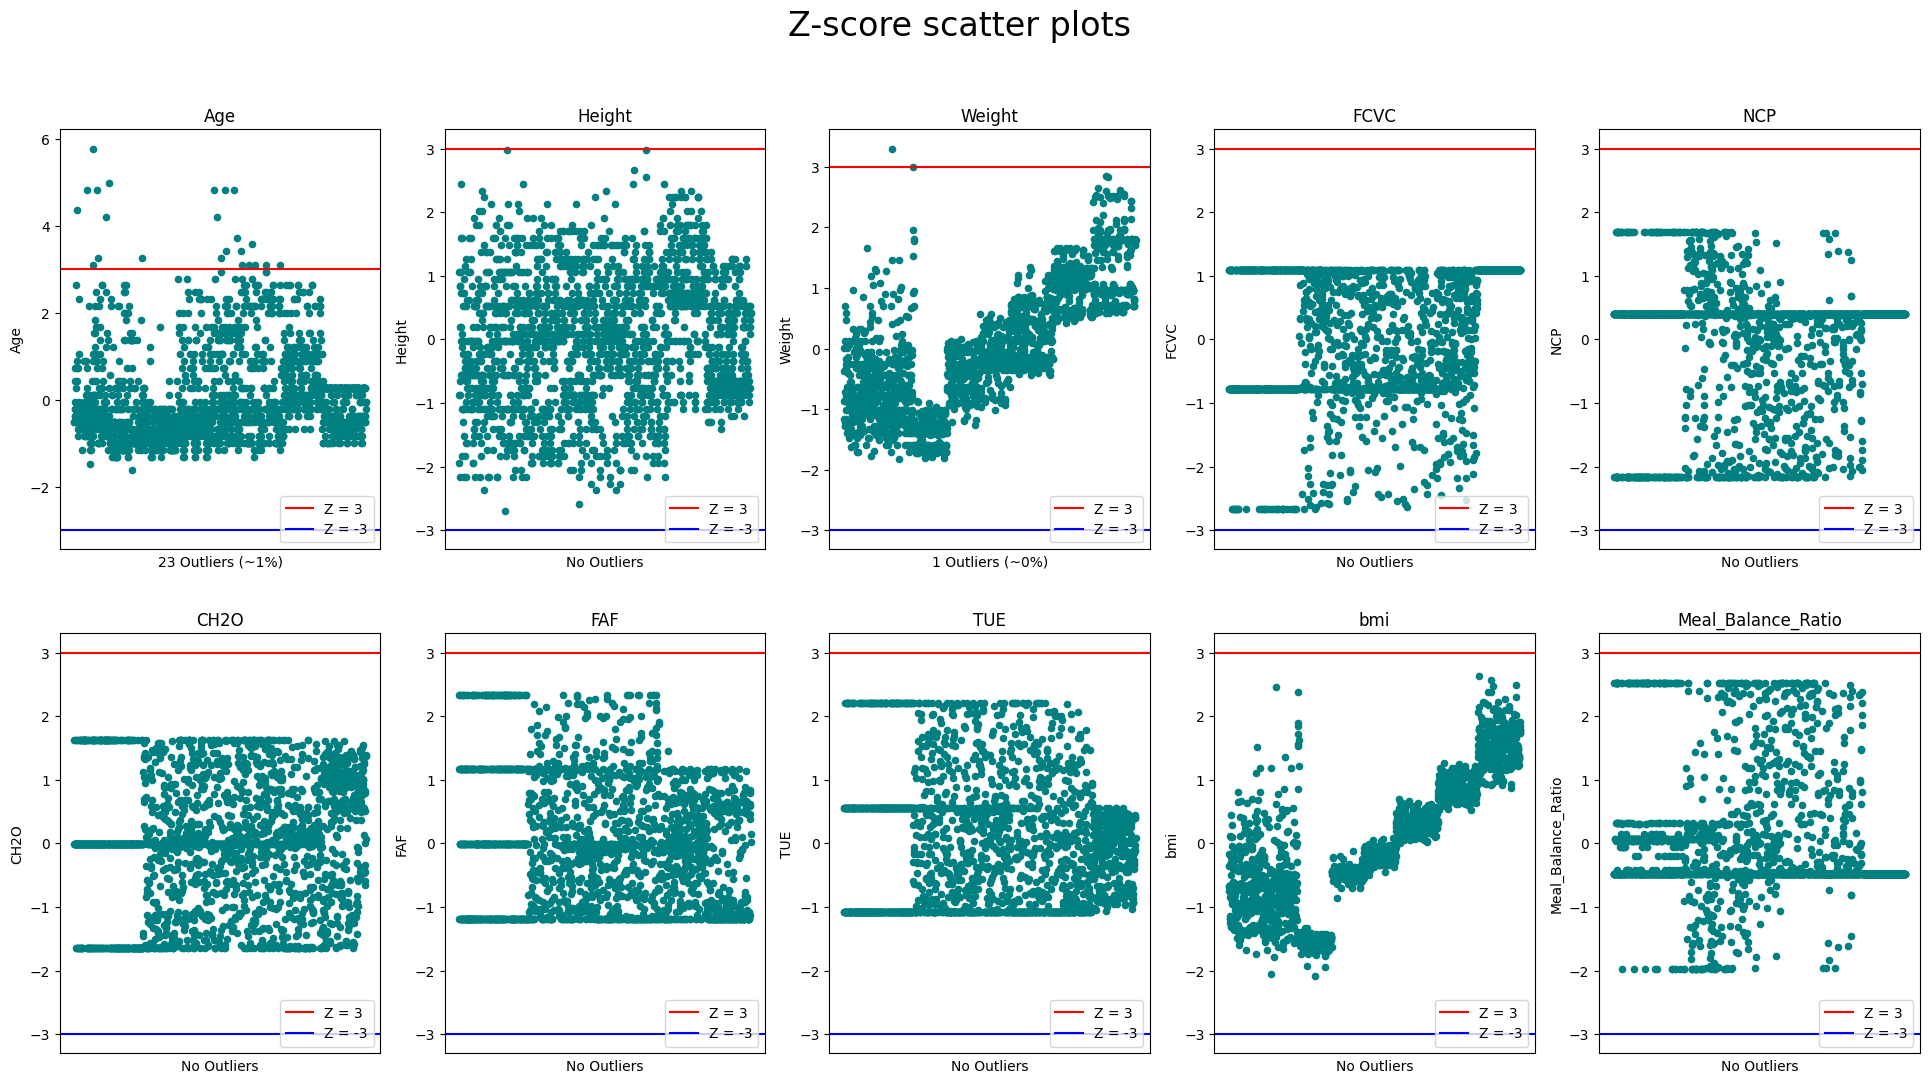

In [143]:
numerical_features = df.select_dtypes("number").columns

zscores = df[numerical_features].apply(lambda col: (col - col.mean()) / col.std(), axis=0)

df_display = df.copy()

rows = 2
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(24, 12))
fig.suptitle('Z-score scatter plots', fontsize=24)

for i, col in enumerate(numerical_features):
    outlier_count = get_outliers(zscores[col], "z-score").size
    
    
    ax = axs[i//cols, i%cols]
    zscores.reset_index().plot.scatter(x="index", y=col, ax=ax, color="teal")
    ax.title.set_text(col)
    ax.axhline(3, color='Red', label='Z = 3')
    ax.axhline(-3, color="Blue", label='Z = -3')
    ax.legend(loc="lower right")
    ax.set_xticks([])
    ax.set_xlabel(f"{outlier_count} Outliers (~{outlier_count*100//len(df)}%)" if outlier_count != 0 else "No Outliers")

plt.show()

These scatter plots show that Age, Weight, and Meal_Balance_Ratio have outliers. 

The Age feature shows less outliers than the IQR boxplots. This shows that the distribution for age is somewhat normal, because Z-scores analysis shows less outliers. I'm sure there is some overlap in outliers for those feature. I will look at these outliers to deside what to do with them.

The Weight feature has one outlier at about a z-score of 3.1. I will review it and take a look if it should be removed or changed.

This shows no outliers in NCP and Meal_Balance_Ratio, which makes sense since Z-scores takes standard deviation into account, instead of the quadrants of IQR box plots. I will see the overlap between these two detection methods to decide what to do next.

In [144]:
age_iqr_outliers = get_outliers(df["Age"], "iqr")
print("Age has", len(age_iqr_outliers), "IQR outliers.")
age_zscore_outliers = get_outliers(df["Age"], "z-score")
print("Age has", len(age_zscore_outliers), "Z-score outliers.")

age_outliers = df.loc[age_iqr_outliers.index.intersection(age_zscore_outliers.index), "Age"]
print("Age has", age_outliers.shape[0], "outliers overlapping in both methods.")

Age has 160 IQR outliers.
Age has 23 Z-score outliers.
Age has 23 outliers overlapping in both methods.


After looking at the outliers from IQR and Z-scores it looks like there is 100% overlap. I think the distribution of Age is slightly normal, therefore the z-scores is a better outlier detection method for this feature. In lieu of those I have desided to explore the 23 outliers (given from z-score detection).  

In [145]:
print("Age outlier min:", age_outliers.min())
print("Age outlier max:", age_outliers.max())

Age outlier min: 44
Age outlier max: 61


The Age outliers seem to range from 44 - 61 years of age. These values are not outliers and completely normal. Since the outliers are normal and meaningful, I will keep them all. Looking at the previous graphs of the distribution of age they dont seem to be any error or anomaly.

In [146]:
df[zscores["Weight"] > 3]

,Age,Height,Weight,overweight_family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,CALC,NObeyesdad,Gender_Male,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,bmi,Meal_Balance_Ratio,Active_Transport_Indicator
344,18,1.87,173.0,True,True,3.0,3.0,Frequently,False,2.0,...,Sometimes,Obesity_Type_III,True,False,False,True,False,49.47239,6.845884,False


After examining the outlier in Weight from both Z-scores and IQR, I have decided to keep it. I think its a resonable to weigh 160 Kg. I dont think it is anomaly either: it is only slightly outside the box plot whiskers, and a z-score of ~3.1. I also dont think that this participant will influence the model too much as they also have a height of 1.87. This height is among the highest so their weight being high as well is not too influencial, not an anomaly, nor an error.

In [147]:
print("NCP IQR:", round(df["NCP"].quantile(0.75) - df["NCP"].quantile(0.25), 2))

NCP_iqr_outliers = get_outliers(df["NCP"], "iqr")
print("NCP has", len(NCP_iqr_outliers), "IQR outliers.")

NCP_zscore_outliers = get_outliers(zscores["NCP"], "z-score")
print("NCP has", len(NCP_zscore_outliers), "Z-score outliers.")

print("Meal_Balance_Ratio IQR:", round(df["Meal_Balance_Ratio"].quantile(0.75) - df["Meal_Balance_Ratio"].quantile(0.25), 2))

NCP_iqr_outliers = get_outliers(df["Meal_Balance_Ratio"], "iqr")
print("Meal_Balance_Ratio has", len(NCP_iqr_outliers), "IQR outliers.")

NCP_zscore_outliers = get_outliers(zscores["Meal_Balance_Ratio"], "z-score")
print("Meal_Balance_Ratio has", len(NCP_zscore_outliers), "Z-score outliers.")

NCP IQR: 0.34
NCP has 580 IQR outliers.
NCP has 0 Z-score outliers.
Meal_Balance_Ratio IQR: 1.57
Meal_Balance_Ratio has 407 IQR outliers.
Meal_Balance_Ratio has 0 Z-score outliers.


For NCP there is a huge discrepency in outliers in both detection methods. The difference between 580 and 0 is big. This is likely due to the multimodal nature of the distribution where the inner-quantile range being only 0.34 because 50% of the values lie on the median. For this reason I will explore percentile-based outlier detection to take into account where the extreme values are based on the nature of the distribution.  

Similar to NCP, IQR-based detection has detected alot of outliers for Meal_Balance_Ratio, while Z-scores-based detection found none. The difference being 407 outliers. Again this is likely due to the multimodal nature of the distribution where the inner-quantile range being only 1.57 because 50% of the values lie on the median. For this reason I will explore percentile outlier detection to take into account where the extreme values are based on the nature of the distribution.

In [148]:
# Using the 99th percentile to get the outliers
# 99% is equivalent to 1.5× IQR, a widely used robust measure for detecting outliers in non-normally distributed data.
threshold = 0.99

NCP_percentile_outliers = get_outliers(df["NCP"], "percentile")
print("NCP has", len(NCP_percentile_outliers), "outliers beyond 99th percentile.")

NCP_percentile_outliers = get_outliers(df["Meal_Balance_Ratio"], "percentile")
print("Meal_Balance_Ratio has", len(NCP_percentile_outliers), "outliers beyond 99th percentile.")

NCP has 0 outliers beyond 99th percentile.
Meal_Balance_Ratio has 0 outliers beyond 99th percentile.


Since percentile-based detection found 0 outliers in both NCP and Meal_Balance_Ratio beyond the 99th percentile, I will conclude there are no true outliers. This aligns with my assumption that Percentile-based detection is more appropriate than IQR in these features, as it does not rely on IQR's fixed spread and instead dynamically adapts to the distribution of values.

# Baseline model comparison

In [149]:

# Before any type of modeling, we need to remove the features related to weight to prevent target leakage
df.drop(["bmi", "Weight"], axis=1, inplace=True)

# Turn categorical features into numerical
cat_cols = df.select_dtypes('category').columns
df[cat_cols] = df[cat_cols].apply(lambda col: col.cat.codes)

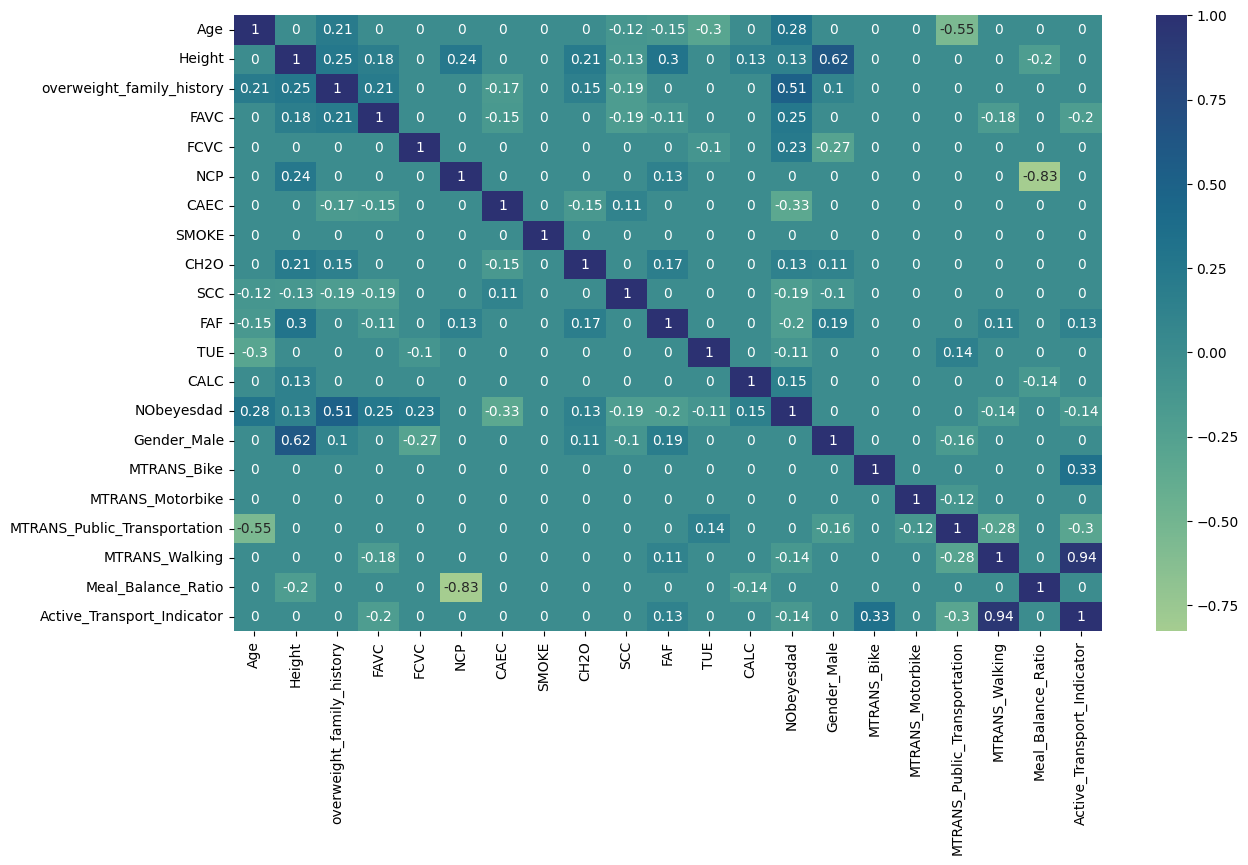

In [150]:
plt.figure(figsize=(14, 8))

corr = df.corr()
corr = corr.apply(lambda col: col.apply(lambda x: 0 if abs(x) < 0.1 else x), axis=0)
sns.heatmap(corr, annot=True, cmap="crest")


plt.show()

From the correlation heatmap I can tell there is some good correlation between the target variable and other features. I will explore linear regression for classification.  

I think the dataset has some pretty complex relationships which leads me to believe tree based models can perform good as well. If there is overfitting, then I will consider ensemble tree models to generalize better.

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear models need scaled data to preform well
X_train_scaled = StandardScaler().set_output(transform="pandas").fit_transform(X_train)
X_test_scaled = StandardScaler().set_output(transform="pandas").fit_transform(X_test)

linear_model = LogisticRegression(n_jobs=-1, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)

linear_model.fit(X_train_scaled, y_train)
tree_model.fit(X_train, y_train)

print("Linear model train accuracy:", round(linear_model.score(X_train_scaled, y_train)*100, 2))
print("Linear model test accuracy:", round(linear_model.score(X_test_scaled, y_test)*100, 2))
print("Tree model train accuracy:", round(tree_model.score(X_train, y_train)*100, 2))
print("Tree model test accuracy:", round(tree_model.score(X_test, y_test)*100, 2))

Linear model train accuracy: 61.2
Linear model test accuracy: 61.7
Tree model train accuracy: 100.0
Tree model test accuracy: 76.83


From these train and testing scores I can conclude that Logistic regression is not overfitting, but performance is relitively low, suggesting there is a lack of a strong linear relationship with in the data. 

On the other hand, the decision tree shows severe overfitting, with a perfect 100% train accuracy, but only a 77% test accuracy. Despite this, the test scores are still a strong indicator that tree-based models capture the petterns within the data.

With proper hyperparameter tuning, tree-based models have the protential to provide strong predictive performance while reducing overfitting.

# Feature importance analysis

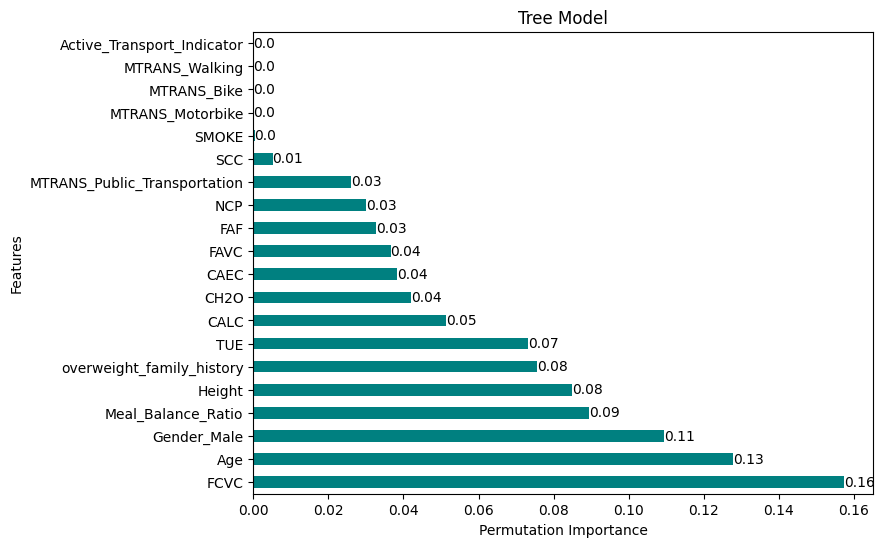

In [152]:
from sklearn.inspection import permutation_importance


tree_results = permutation_importance(tree_model, X_test, y_test, scoring="roc_auc_ovo", n_repeats=10, random_state=42)
importances = pd.Series(tree_results.importances_mean, index=X.columns)
importances = importances.sort_values(ascending=False)

tree_sorted_idx = tree_results.importances_mean.argsort()
tree_sorted_idx = tree_sorted_idx[::-1]

plt.figure(figsize=(8, 6))
importances.plot.barh(color="teal")
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Tree Model")

#label bar values
for i, v in enumerate(importances):
    plt.text(v if v < 0.25 else v/2, i, str(round(v, 2)), va="center")

plt.show()

Looking at the feature importance bar chart reveals that there is a steep drop off after MTRANS_Public_Transportation (Importance = 0.03). Based on this, I will use a cutoff of 0.03 and retain only features with higher importance for predictive modeling.

# Hyperparameter tuning

In [153]:
from sklearn.model_selection import GridSearchCV

importances = importances[importances > 0.02].sort_values(ascending=False)

X = df.drop("NObeyesdad", axis=1)[importances.index]
y = df["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10, 20, 30],
    "min_samples_leaf": [1, 5, 10],
    "max_features": [None, "sqrt", "log2"],
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
    "criterion": ["gini", "entropy"],
    "random_state": [42]
}


scoring = "roc_auc_ovo"
tree_search_cv = GridSearchCV(DecisionTreeClassifier(), 
                                   params,
                                   cv=5, 
                                   n_jobs=-1, 
                                   scoring=scoring,
                                   verbose=1)

tree_search_cv.fit(X, y)
tree_search_cv.scorer_
print("Best params:", tree_search_cv.best_params_)
print(f"Best {scoring} score:", tree_search_cv.best_score_)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best params: {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 42}
Best roc_auc_ovo score: 0.912165359775021


Based on the parameter search performed using GridSearchCV, the model selected an estimator with the listed parameters. These hyperparameters resulted in the highest ROC-AUC score of 0.912, indicating that the model effectively distinguishes between different obesity levels.

In [154]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score


y_pred = cross_val_predict(tree_search_cv.best_estimator_, X, y, cv=5, n_jobs=-1)
y_pred_proba = cross_val_predict(tree_search_cv.best_estimator_, X, y, cv=5, n_jobs=-1, method="predict_proba")
print("ROC-AUC-OVO Score", roc_auc_score(y, y_pred_proba, multi_class="ovo"))

print(classification_report(y, y_pred))

ROC-AUC-OVO Score 0.9093538375690022
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       272
           1       0.51      0.58      0.54       287
           2       0.68      0.61      0.64       290
           3       0.61      0.63      0.62       290
           4       0.73      0.70      0.71       351
           5       0.82      0.83      0.83       297
           6       0.96      0.99      0.98       324

    accuracy                           0.73      2111
   macro avg       0.73      0.73      0.73      2111
weighted avg       0.73      0.73      0.73      2111



The classification report shows that after hyperparameter tuning and feature importance analysis, the Decision tree model achieves an accuracy of 74%. This is slightly lower than before tuning, indicating that the model has become more generalized.

Additionally, the model predicts Obesity Type 3 (Class 6) exceptionally well, achieving a 98% accuracy with a 99% recall and 96% prescision. This demonstrates the model is very strong at indentifying extreme obesity cases.

While the model performs well overall, mid-level obesity classifications (Classes 1-4) have slightly lower prescision and recall. This could be improved thorugh further feature engineering efforts or utilizing advance ensemble techniques.

# Conclusion

I have successfully achieved my goal of predicting obesity level using survey health data. Through feature engineer, outlier detection, hyperparameter tuning, and ROC-AUC optimizations, I have developed a model that predicts obesity at 74% accuracy with a 0.912 ROC-AUC score. 

The model performs strongly in extreme obesity cases, but has a slight weakness in mid-level obesity categories. While it effectively indentifies severe obesity cases, distinguishing between moderate obesity is still a challange for the model.

To further improve this further, additional feature engineering could be explored to develop more advance features that enchance the predictive power. Additionally, ensemble models like Random Forest Tree, could help generalizes better, leading to more balanced scores across the prediction classes.